In [86]:
#importing all necessary libraries
import os
import re

#importing libraries needed for data analysis
import numpy as np
import pandas as pd

#importing libraries needed for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries used for analysing images
import skimage.io
import skimage.feature
import skimage.transform
from glob import glob

In [87]:
from sklearn.base import BaseEstimator,TransformerMixin

class RGB2GRAY_Transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])
    
class HOG_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self,orientations=9,pixels_per_cell=(8,8),cells_per_block=(3,3)):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
        
    def fit(self, X, y=None):
        return self
    def transform(self, X,y=None):
        def hog(img):
            features_hog = skimage.feature.hog(img,orientations=self.orientations,pixels_per_cell=self.pixels_per_cell,cells_per_block=self.cells_per_block)
            return features_hog
        hog_features = np.array([hog(x) for x in X])
        return hog_features

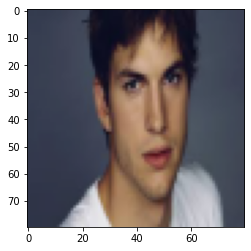

In [88]:
img = skimage.io.imread('Images/human.jpg')

#resize the image into 80*80 as we have trained our all images at 80 by 80only
resized_image = skimage.transform.resize(img,(80,80))
scaled_resized_image = 255*resized_image
final_img = scaled_resized_image.astype(np.uint8)
plt.imshow(final_img)

In [89]:
#convertion to gray
gray_img = skimage.color.rgb2gray(final_img)

#conversion to hog 
hog_img = skimage.feature.hog(final_img)

In [90]:
hog_img

array([0.05342976, 0.01280063, 0.02428749, ..., 0.00364566, 0.00144107,
       0.21873065])

In [91]:
import pickle
model = pickle.load(open('Image_Classification.pickle','rb'))
scaler = pickle.load(open('Scaler.pickle','rb'))

In [92]:
hog_img_reshaped = hog_img.reshape(1,-1)
scaled_img = scaler.transform(hog_img_reshaped)

In [93]:
scaled_img.shape

(1, 5184)

In [94]:
model.predict(scaled_img)

array(['human'], dtype='<U8')

In [95]:
#let calaculate the probability of each class such that given image belongs to that class.
value = model.decision_function(scaled_img)
classes = model.classes_

In [96]:
value

array([[-12603.35234555,  -9467.00595535,  -9888.66396592,
         -5420.30568587,  -5586.26532218,  -8873.99789854,
         -5473.20895205,  -3006.03886205,  -7076.64767801,
           947.61802711, -10743.46069639,  -9064.16267576,
         -6401.06588249,  -5981.47638497,  -8887.37071878,
         -6340.13893442,  -6691.31691246,   -211.76757064,
         -8019.64766231, -10674.57852336]])

In [97]:
z = scipy.stats.zscore(value[0])
prob_value = scipy.special.softmax(z)

In [98]:
top_5 = prob_value.argsort()[::-1][:5]

In [99]:
top_5_values = prob_value[top_5]

In [100]:
matched_labels = classes[top_5]

In [101]:
matched_labels

array(['human', 'sheep', 'eagle', 'cow', 'duck'], dtype='<U8')

In [102]:
dict1 = {}
for i in range(5):
    dict1[matched_labels[i]]=np.round(top_5_values[i],3)

In [103]:
dict1

{'human': 0.299, 'sheep': 0.211, 'eagle': 0.091, 'cow': 0.044, 'duck': 0.043}